In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bollywood-actress-name-and-movie-list/BollywoodMovieDetail.csv


In [2]:
import pandas as pd


# Load the csv file into a pandas DataFrame
df = pd.read_csv('/kaggle/input/bollywood-actress-name-and-movie-list/BollywoodMovieDetail.csv')

# Display the first few rows of the DataFrame
df.head()


,imdbId,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20-Apr-01,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,8-May-02,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,tt0187279,Meri Biwi Ka Jawab Nahin,2004,2-Jul-04,Action | Comedy,NaN,Akshay Kumar | Sridevi | Gulshan Grover | Laxm...,Pankaj Parashar | S.M. Iqbal,0.0,1
3,tt0222024,Hum Tumhare Hain Sanam,2002,24-May-02,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30-Mar-01,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1


In [3]:
# Check for missing values in the DataFrame
df.isnull().sum()


imdbId           0
title            0
releaseYear      0
releaseDate     53
genre            2
writers        119
actors           3
directors        4
sequel           3
hitFlop          0
dtype: int64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


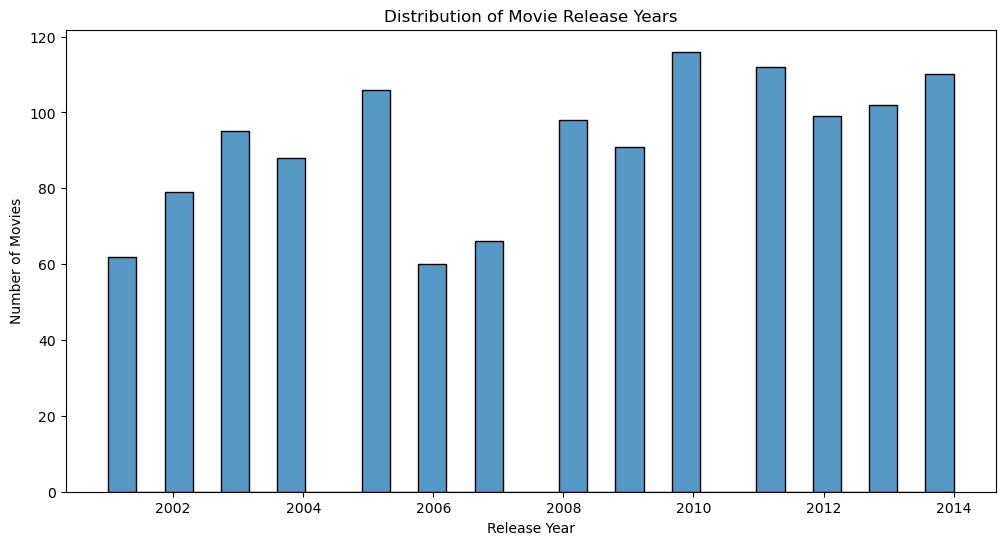

Number of unique actors: 1815
Number of unique directors: 761
Number of unique writers: 2217


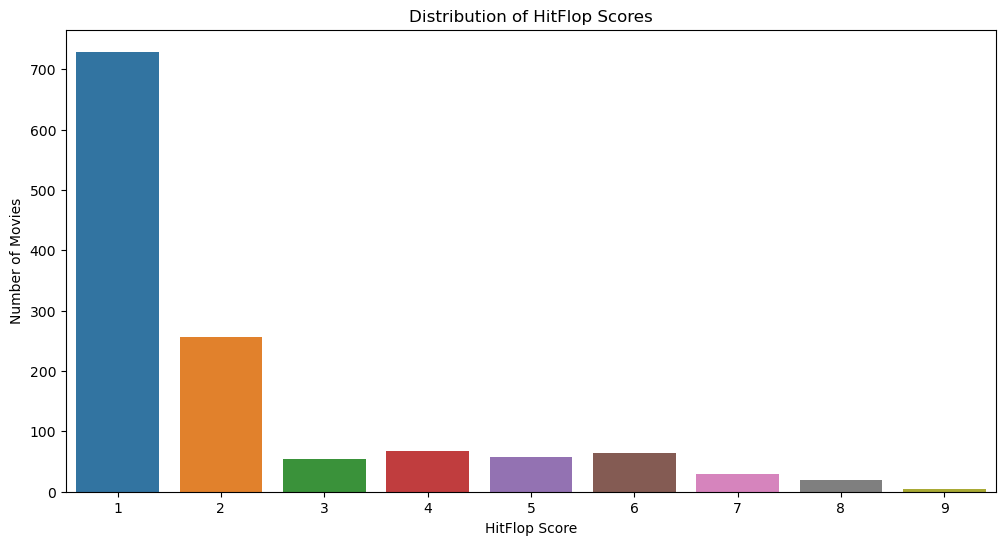

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(df['releaseYear'], kde=False, bins=30)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

# Print the number of unique actors, directors, and writers
print("Number of unique actors:", len(pd.unique(df['actors'].str.cat(sep=' | ').split(' | '))))
print("Number of unique directors:", len(pd.unique(df['directors'].dropna().str.cat(sep=' | ').split(' | '))))
print("Number of unique writers:", len(pd.unique(df['writers'].dropna().str.cat(sep=' | ').split(' | '))))

# Plot the distribution of hitFlop scores
plt.figure(figsize=(12, 6))
sns.countplot(x='hitFlop', data=df)
plt.title('Distribution of HitFlop Scores')
plt.xlabel('HitFlop Score')
plt.ylabel('Number of Movies')
plt.show()


/tmp/ipykernel_20/3431380424.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/3431380424.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/3431380424.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/3431380424.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

Top 10 Genres with Highest Success Rate:
                       Genre  SuccessRate
4                    Western     5.000000
7                  Biography     3.076923
24                    Comedy     2.543624
25                   Romance     2.510753
13           Action |Romance     2.432836
2                      Music     2.423077
22                   Musical     2.410000
5   Action |Drama |Adventure     2.400298
14                    Sci-Fi     2.400000
3                      Sport     2.357143


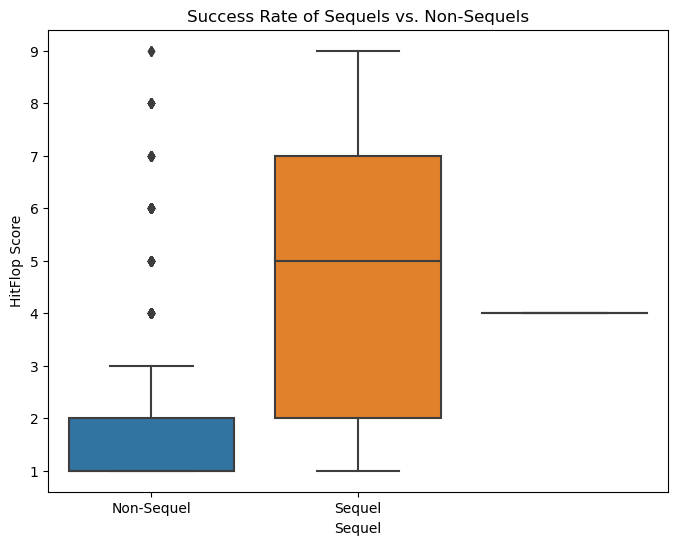

In [5]:
# Get the list of unique genres
unique_genres = set(df['genre'].dropna().str.cat(sep=' | ').split(' | '))

# Create a DataFrame to store the success rate for each genre
genre_success_rate = pd.DataFrame(columns=['Genre', 'SuccessRate'])

# Calculate the success rate for each genre
for genre in unique_genres:
    genre_movies = df[df['genre'].str.contains(genre, na=False)]
    success_rate = genre_movies['hitFlop'].mean()
    genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)

# Sort the DataFrame by success rate in descending order
genre_success_rate = genre_success_rate.sort_values(by='SuccessRate', ascending=False)

# Display the top 10 genres with the highest success rate
print("Top 10 Genres with Highest Success Rate:")
print(genre_success_rate.head(10))

# Plot the success rate of sequels vs. non-sequels
plt.figure(figsize=(8, 6))
sns.boxplot(x='sequel', y='hitFlop', data=df)
plt.title('Success Rate of Sequels vs. Non-Sequels')
plt.xlabel('Sequel')
plt.ylabel('HitFlop Score')
plt.xticks([0, 1], ['Non-Sequel', 'Sequel'])
plt.show()


/tmp/ipykernel_20/3734009425.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


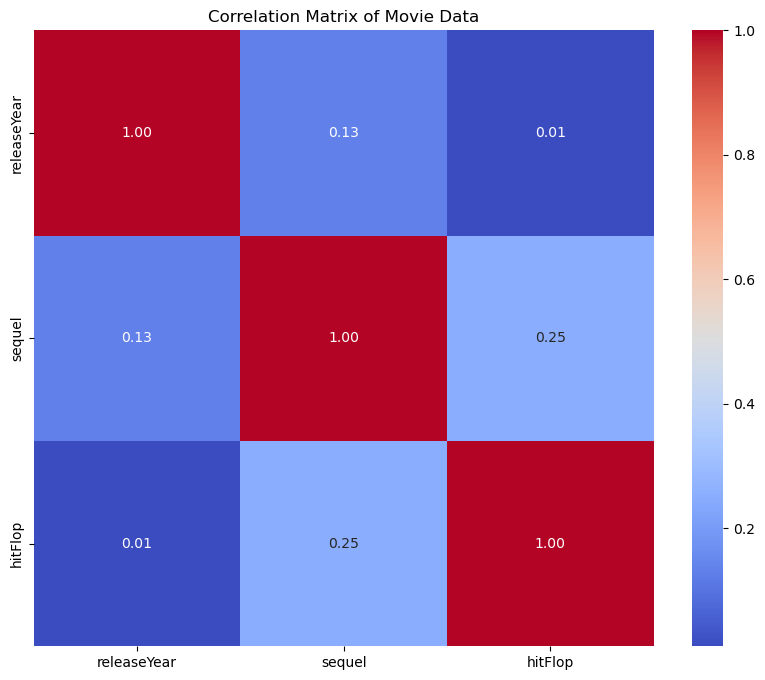

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Movie Data')
plt.show()


/tmp/ipykernel_20/3623898092.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actor_success_rate = actor_success_rate.append({'Actor': actor, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/3623898092.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actor_success_rate = actor_success_rate.append({'Actor': actor, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/3623898092.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actor_success_rate = actor_success_rate.append({'Actor': actor, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/3623898092.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

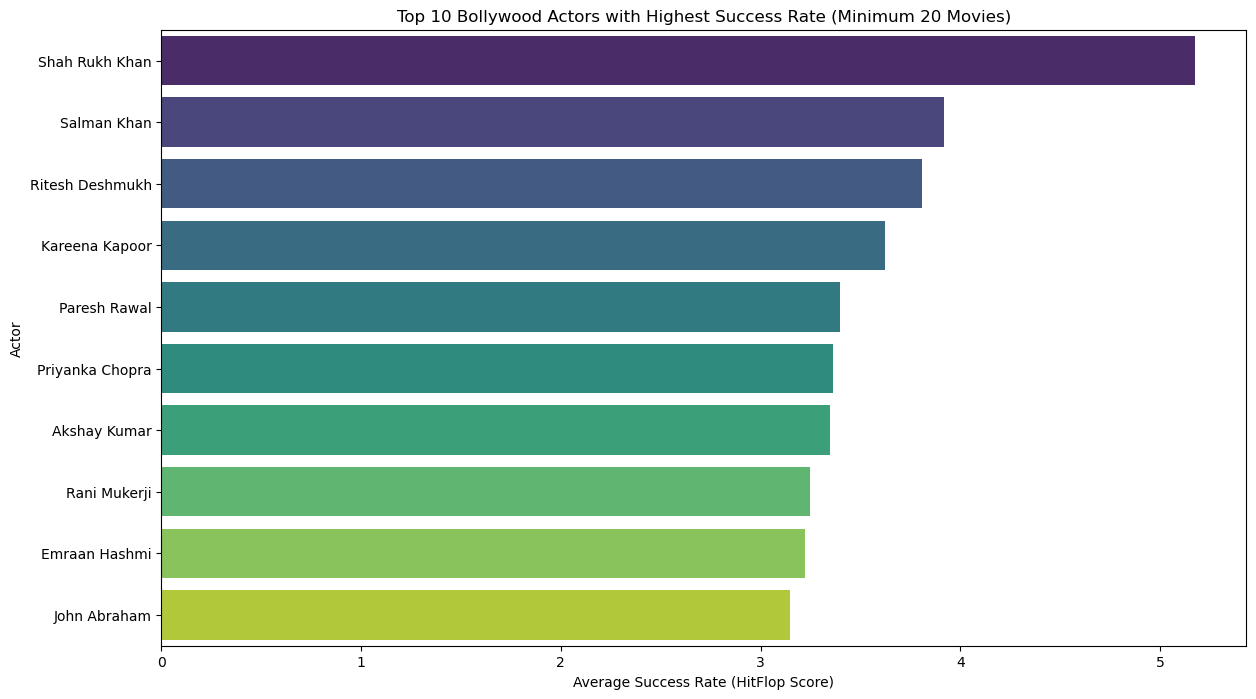

In [7]:
# Set the minimum number of movies
min_movies = 20

# Create a list of all actors
all_actors = df['actors'].str.cat(sep=' | ').split(' | ')

# Create a DataFrame with actor names and their movie counts
actor_counts = pd.DataFrame(pd.Series(all_actors).value_counts(), columns=['MovieCount'])

# Filter the DataFrame to only include actors who have appeared in at least `min_movies` movies
popular_actors = actor_counts[actor_counts['MovieCount'] >= min_movies]

# Create a DataFrame to store the success rate for each popular actor
actor_success_rate = pd.DataFrame(columns=['Actor', 'SuccessRate'])

# Calculate the success rate for each popular actor
for actor in popular_actors.index:
    actor_movies = df[df['actors'].str.contains(actor, na=False)]
    success_rate = actor_movies['hitFlop'].mean()
    actor_success_rate = actor_success_rate.append({'Actor': actor, 'SuccessRate': success_rate}, ignore_index=True)

# Sort the DataFrame by success rate in descending order
actor_success_rate = actor_success_rate.sort_values(by='SuccessRate', ascending=False)

# Display the top 10 actors with the highest success rate
top_actors = actor_success_rate.head(10)

# Plot the success rate of the top 10 actors
plt.figure(figsize=(14, 8))
sns.barplot(x='SuccessRate', y='Actor', data=top_actors, palette='viridis')
plt.title('Top 10 Bollywood Actors with Highest Success Rate (Minimum 20 Movies)')
plt.xlabel('Average Success Rate (HitFlop Score)')
plt.ylabel


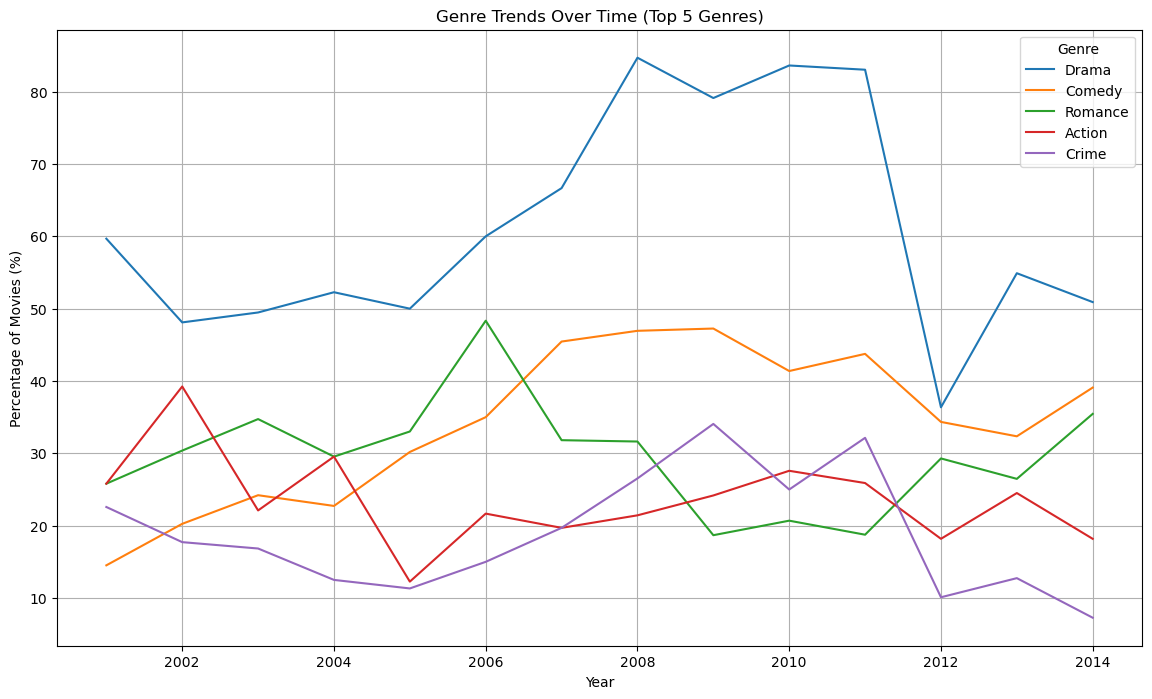

In [8]:
# Create a list of all genres
all_genres = df['genre'].str.cat(sep=' | ').split(' | ')

# Create a DataFrame with genre names and their counts
genre_counts = pd.DataFrame(pd.Series(all_genres).value_counts(), columns=['MovieCount'])

# Get the top 5 genres
top_genres = genre_counts.head(5).index.tolist()

# Create a DataFrame to store the percentage of movies in each genre for each year
genre_trends = pd.DataFrame(index=df['releaseYear'].sort_values().unique(), columns=top_genres)

# Fill the DataFrame
for genre in top_genres:
    for year in genre_trends.index:
        year_movies = df[df['releaseYear'] == year]
        genre_movies = year_movies[year_movies['genre'].str.contains(genre, na=False)]
        genre_trends.loc[year, genre] = len(genre_movies) / len(year_movies) * 100

# Plot the genre trends over time
plt.figure(figsize=(14, 8))
for genre in top_genres:
    plt.plot(genre_trends.index, genre_trends[genre], label=genre)

plt.title('Genre Trends Over Time (Top 5 Genres)')
plt.xlabel('Year')
plt.ylabel('Percentage of Movies (%)')
plt.legend(title='Genre')
plt.grid()
plt.show()


/tmp/ipykernel_20/2233166534.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_success_rate = month_success_rate.append({'Month': month, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/2233166534.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_success_rate = month_success_rate.append({'Month': month, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/2233166534.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_success_rate = month_success_rate.append({'Month': month, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/2233166534.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

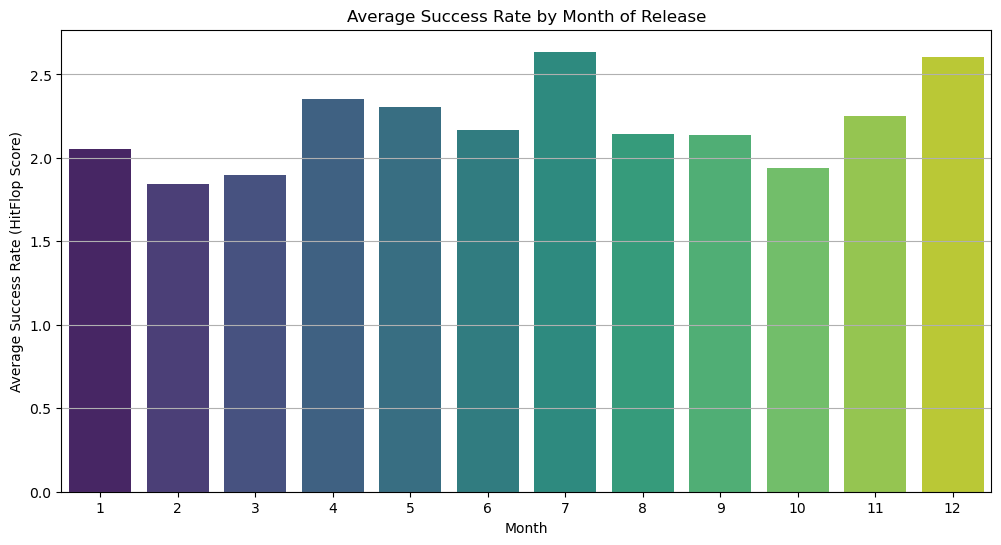

In [9]:
# Convert releaseDate to datetime format and create a new column for the release month
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce', dayfirst=True)
df['releaseMonth'] = df['releaseDate'].dt.month

# Create a DataFrame to store the average success rate for each month
month_success_rate = pd.DataFrame(columns=['Month', 'SuccessRate'])

# Calculate the success rate for each month
for month in range(1, 13):
    month_movies = df[df['releaseMonth'] == month]
    success_rate = month_movies['hitFlop'].mean()
    month_success_rate = month_success_rate.append({'Month': month, 'SuccessRate': success_rate}, ignore_index=True)

# Sort the DataFrame by month
month_success_rate['Month'] = month_success_rate['Month'].astype(int)
month_success_rate = month_success_rate.sort_values(by='Month')

# Plot the average success rate for each month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='SuccessRate', data=month_success_rate, palette='viridis')
plt.title('Average Success Rate by Month of Release')
plt.xlabel('Month')
plt.ylabel('Average Success Rate (HitFlop Score)')
plt.grid(axis='y')
plt.show()


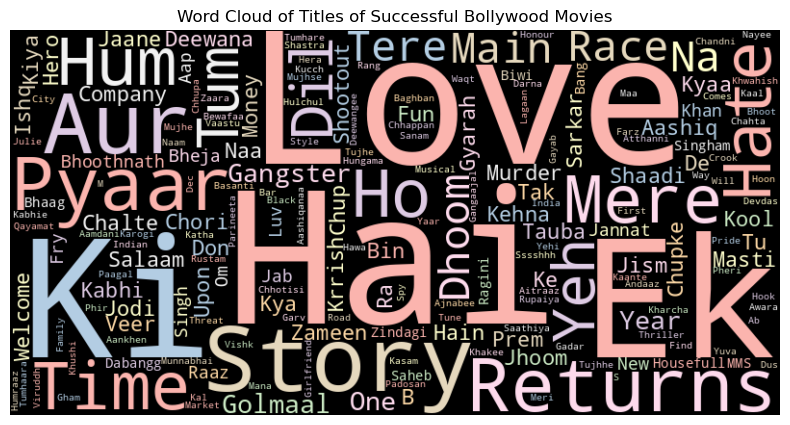

In [10]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

# Define the threshold for a movie to be considered "successful"
threshold = df['hitFlop'].quantile(0.75)

# Get the titles of the successful movies
successful_movies = df[df['hitFlop'] > threshold]
successful_titles = " ".join(successful_movies['title'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='black', colormap='Pastel1', collocations=False).generate(successful_titles)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles of Successful Bollywood Movies')
plt.show()


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for the VIF calculation
numeric_cols = df.select_dtypes(include=[np.number]).dropna()

# Add a constant column for the VIF calculation
numeric_cols['Constant'] = 1

# Calculate VIF for each numeric column
vif = pd.DataFrame()
vif['Variable'] = numeric_cols.columns
vif['VIF'] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]

vif


,Variable,VIF
0,releaseYear,1.021726
1,sequel,1.087081
2,hitFlop,1.070831
3,releaseMonth,1.005174
4,Constant,264221.747416


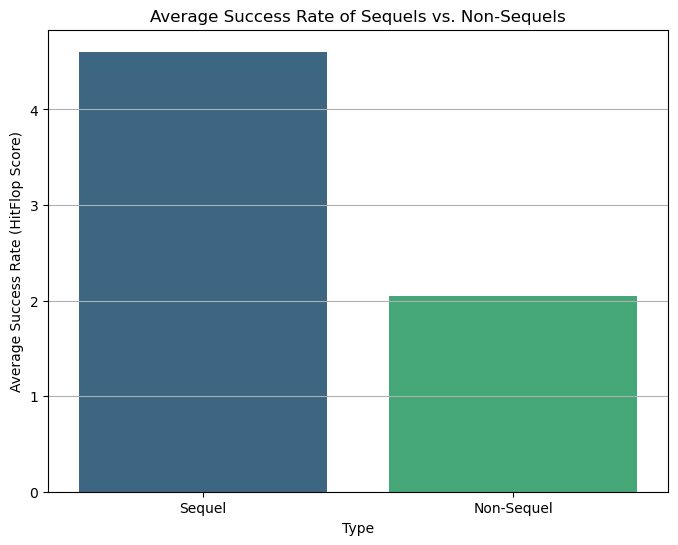

In [12]:
# Drop rows with missing 'sequel' values
df_sequel = df.dropna(subset=['sequel'])

# Calculate the average hitFlop score for sequels and non-sequels
avg_hitFlop_sequel = df_sequel[df_sequel['sequel'] == 1]['hitFlop'].mean()
avg_hitFlop_non_sequel = df_sequel[df_sequel['sequel'] == 0]['hitFlop'].mean()

# Create a DataFrame for the plot
df_avg_hitFlop = pd.DataFrame({
    'Type': ['Sequel', 'Non-Sequel'],
    'Average HitFlop Score': [avg_hitFlop_sequel, avg_hitFlop_non_sequel]
})

# Plot the average hitFlop scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='Average HitFlop Score', data=df_avg_hitFlop, palette='viridis')
plt.title('Average Success Rate of Sequels vs. Non-Sequels')
plt.ylabel('Average Success Rate (HitFlop Score)')
plt.grid(axis='y')
plt.show()


/tmp/ipykernel_20/2231808333.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/2231808333.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/2231808333.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/2231808333.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

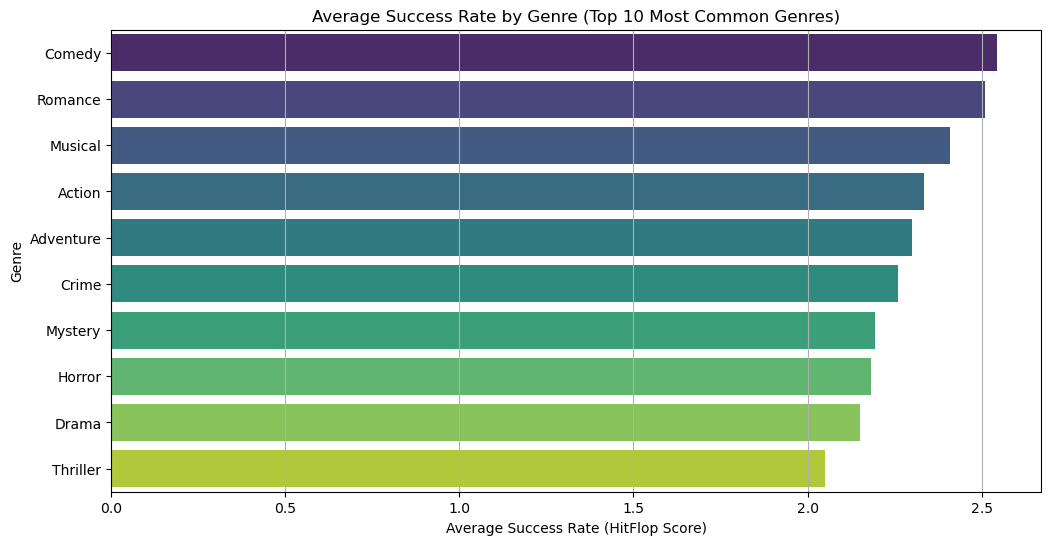

In [13]:
# Get the top 10 most common genres
top_genres = genre_counts.head(10).index.tolist()

# Create a DataFrame to store the success rate for each genre
genre_success_rate = pd.DataFrame(columns=['Genre', 'SuccessRate'])

# Calculate the success rate for each genre
for genre in top_genres:
    genre_movies = df[df['genre'].str.contains(genre, na=False)]
    success_rate = genre_movies['hitFlop'].mean()
    genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)

# Sort the DataFrame by success rate in descending order
genre_success_rate = genre_success_rate.sort_values(by='SuccessRate', ascending=False)

# Plot the success rate of the genres
plt.figure(figsize=(12, 6))
sns.barplot(x='SuccessRate', y='Genre', data=genre_success_rate, palette='viridis')
plt.title('Average Success Rate by Genre (Top 10 Most Common Genres)')
plt.xlabel('Average Success Rate (HitFlop Score)')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.show()


/tmp/ipykernel_20/1478662808.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  director_success_rate = director_success_rate.append({'Director': director, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/1478662808.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  director_success_rate = director_success_rate.append({'Director': director, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/1478662808.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  director_success_rate = director_success_rate.append({'Director': director, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/1478662808.py:17: FutureWarning: The frame.append method is deprecated and will be removed fro

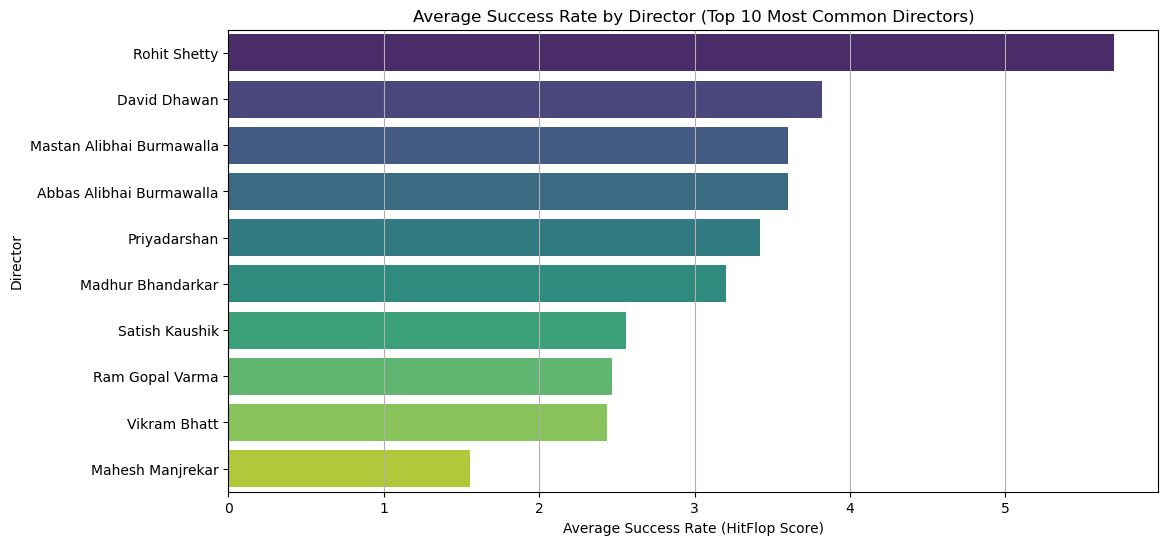

In [14]:
# Create a list of all directors
all_directors = df['directors'].dropna().str.cat(sep=' | ').split(' | ')

# Create a DataFrame with director names and their movie counts
director_counts = pd.DataFrame(pd.Series(all_directors).value_counts(), columns=['MovieCount'])

# Get the top 10 directors
top_directors = director_counts.head(10).index.tolist()

# Create a DataFrame to store the success rate for each director
director_success_rate = pd.DataFrame(columns=['Director', 'SuccessRate'])

# Calculate the success rate for each director
for director in top_directors:
    director_movies = df[df['directors'].str.contains(director, na=False)]
    success_rate = director_movies['hitFlop'].mean()
    director_success_rate = director_success_rate.append({'Director': director, 'SuccessRate': success_rate}, ignore_index=True)

# Sort the DataFrame by success rate in descending order
director_success_rate = director_success_rate.sort_values(by='SuccessRate', ascending=False)

# Plot the success rate of the directors
plt.figure(figsize=(12, 6))
sns.barplot(x='SuccessRate', y='Director', data=director_success_rate, palette='viridis')
plt.title('Average Success Rate by Director (Top 10 Most Common Directors)')
plt.xlabel('Average Success Rate (HitFlop Score)')
plt.ylabel('Director')
plt.grid(axis='x')
plt.show()


/tmp/ipykernel_20/1406690406.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  writer_movies = df[df['writers'].str.contains(writer, na=False)]
/tmp/ipykernel_20/1406690406.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  writer_success_rate = writer_success_rate.append({'Writer': writer, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/1406690406.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  writer_movies = df[df['writers'].str.contains(writer, na=False)]
/tmp/ipykernel_20/1406690406.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  writer_success_rate = writer_success_rate.append({'Writer': writer, '

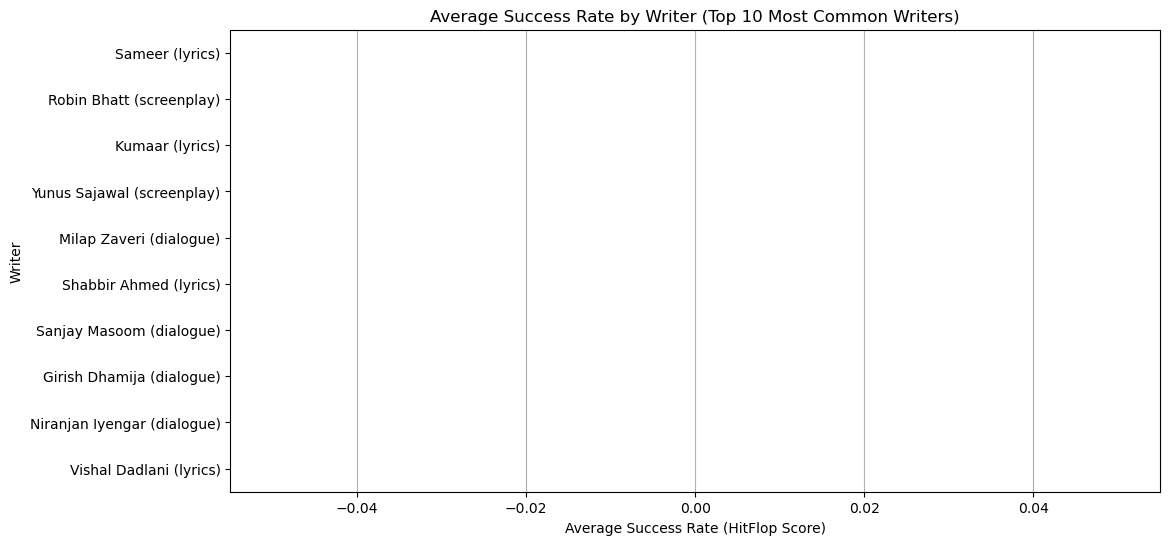

In [15]:
# Create a list of all writers
all_writers = df['writers'].dropna().str.cat(sep=' | ').split(' | ')

# Create a DataFrame with writer names and their movie counts
writer_counts = pd.DataFrame(pd.Series(all_writers).value_counts(), columns=['MovieCount'])

# Get the top 10 writers
top_writers = writer_counts.head(10).index.tolist()

# Create a DataFrame to store the success rate for each writer
writer_success_rate = pd.DataFrame(columns=['Writer', 'SuccessRate'])

# Calculate the success rate for each writer
for writer in top_writers:
    writer_movies = df[df['writers'].str.contains(writer, na=False)]
    success_rate = writer_movies['hitFlop'].mean()
    writer_success_rate = writer_success_rate.append({'Writer': writer, 'SuccessRate': success_rate}, ignore_index=True)

# Sort the DataFrame by success rate in descending order
writer_success_rate = writer_success_rate.sort_values(by='SuccessRate', ascending=False)

# Plot the success rate of the writers
plt.figure(figsize=(12, 6))
sns.barplot(x='SuccessRate', y='Writer', data=writer_success_rate, palette='viridis')
plt.title('Average Success Rate by Writer (Top 10 Most Common Writers)')
plt.xlabel('Average Success Rate (HitFlop Score)')
plt.ylabel('Writer')
plt.grid(axis='x')
plt.show()


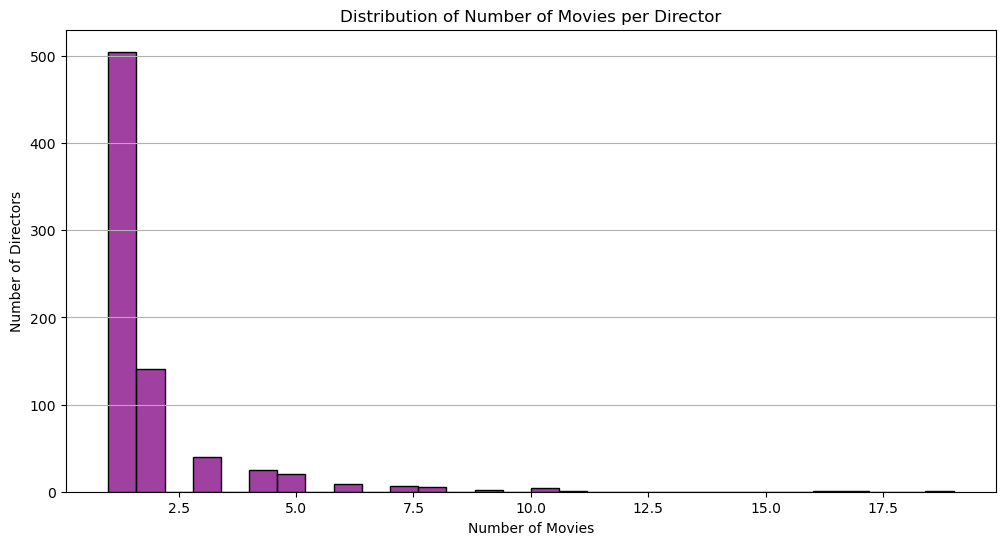

In [16]:
# Create a DataFrame with director names and their movie counts
director_counts = pd.DataFrame(pd.Series(all_directors).value_counts(), columns=['MovieCount'])

# Plot the histogram of the number of movies per director
plt.figure(figsize=(12, 6))
sns.histplot(director_counts['MovieCount'], bins=30, color='purple')
plt.title('Distribution of Number of Movies per Director')
plt.xlabel('Number of Movies')
plt.ylabel('Number of Directors')
plt.grid(axis='y')
plt.show()


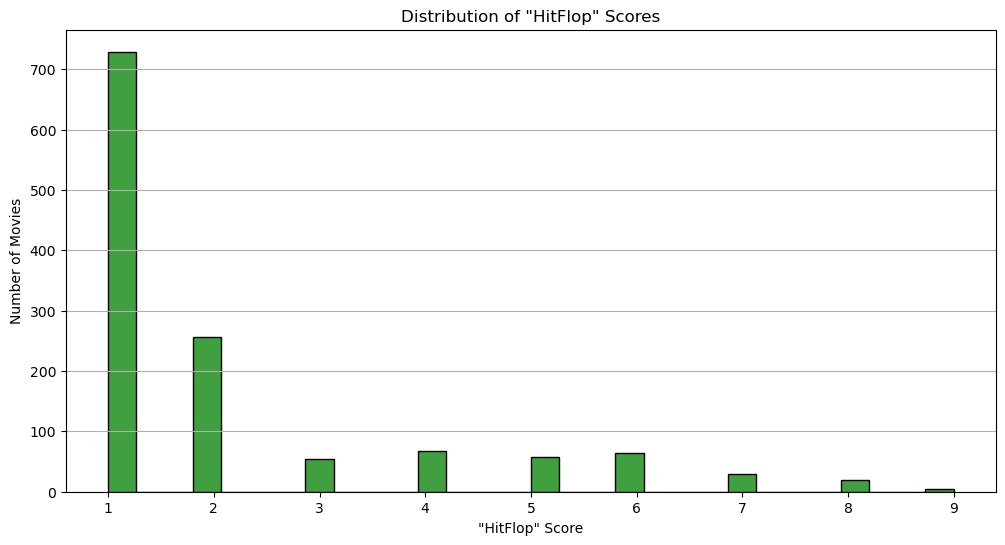

In [17]:
# Plot the histogram of the "hitFlop" scores
plt.figure(figsize=(12, 6))
sns.histplot(df['hitFlop'], bins=30, color='green')
plt.title('Distribution of "HitFlop" Scores')
plt.xlabel('"HitFlop" Score')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()


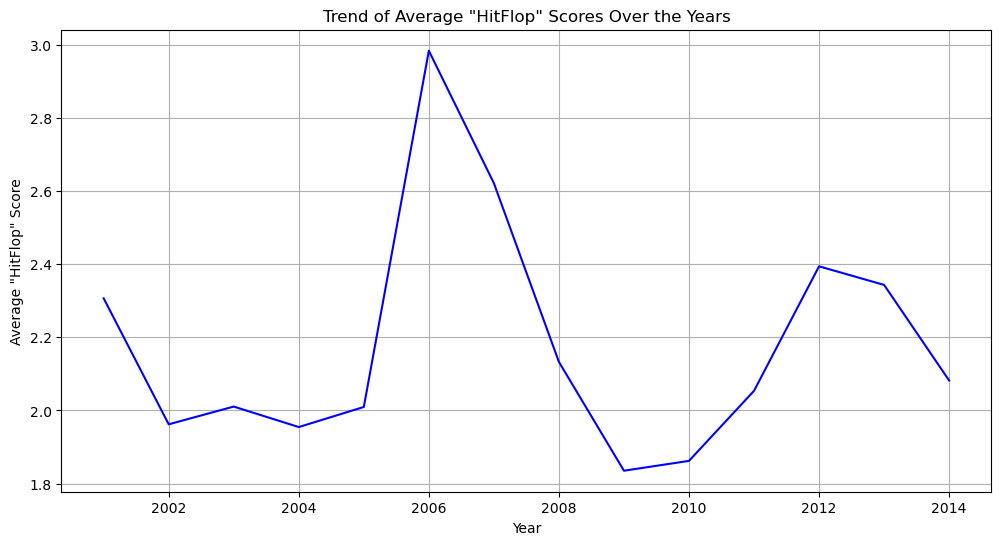

In [18]:
# Calculate the average "hitFlop" score for each year
avg_hitFlop_year = df.groupby('releaseYear')['hitFlop'].mean()

# Plot the trend of the average "hitFlop" scores over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_hitFlop_year.index, y=avg_hitFlop_year.values, color='blue')
plt.title('Trend of Average "HitFlop" Scores Over the Years')
plt.xlabel('Year')
plt.ylabel('Average "HitFlop" Score')
plt.grid()
plt.show()


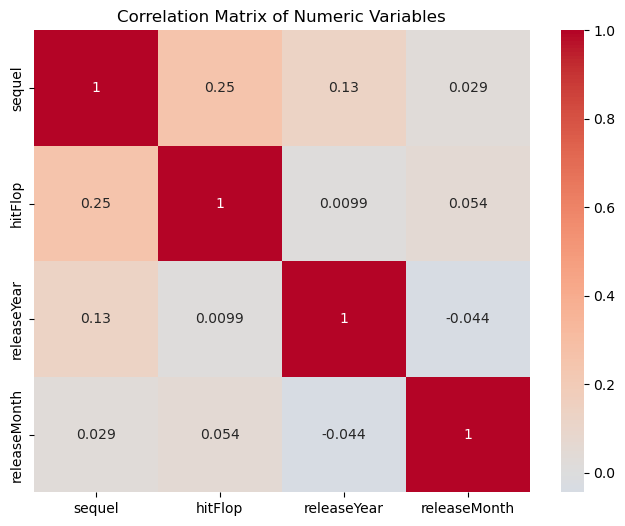

In [19]:
# Select the columns for the correlation matrix
cols = ['sequel', 'hitFlop', 'releaseYear', 'releaseMonth']

# Calculate the correlation matrix
corr_matrix = df[cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


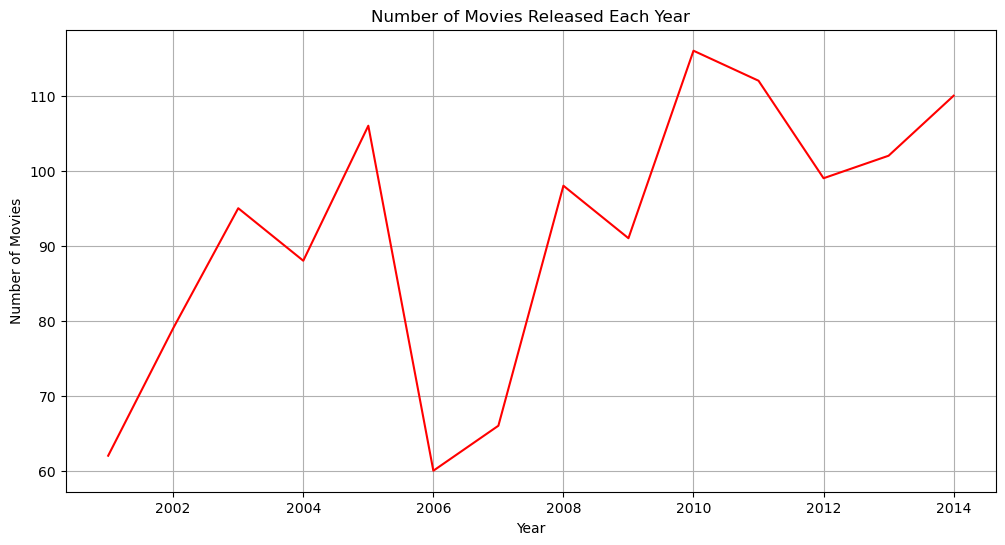

In [20]:
# Count the number of movies released each year
movies_per_year = df['releaseYear'].value_counts().sort_index()

# Plot the number of movies released each year
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, color='red')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid()
plt.show()


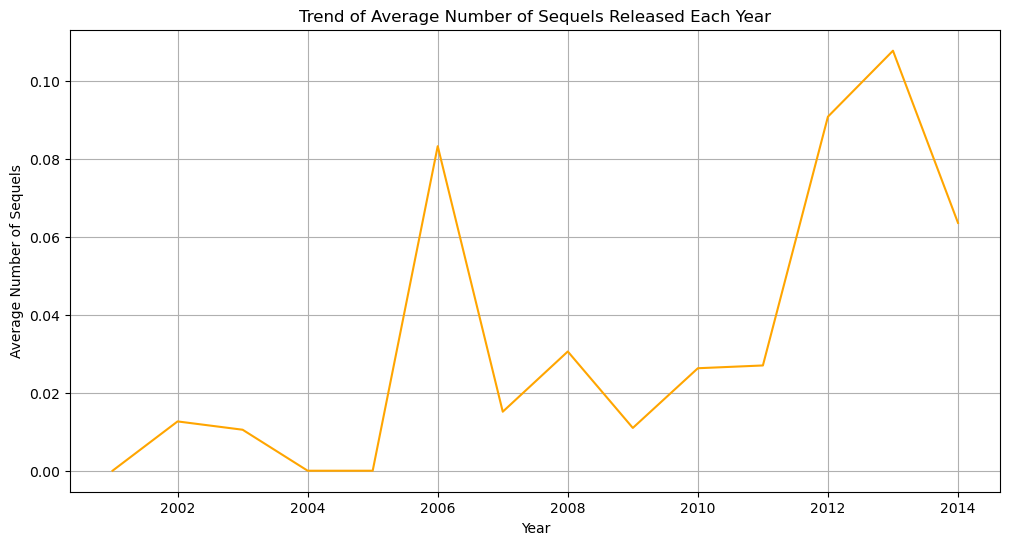

In [21]:
# Calculate the average number of sequels released each year
avg_sequels_year = df_sequel.groupby('releaseYear')['sequel'].mean()

# Plot the trend of the average number of sequels released each year
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_sequels_year.index, y=avg_sequels_year.values, color='orange')
plt.title('Trend of Average Number of Sequels Released Each Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Sequels')
plt.grid()
plt.show()


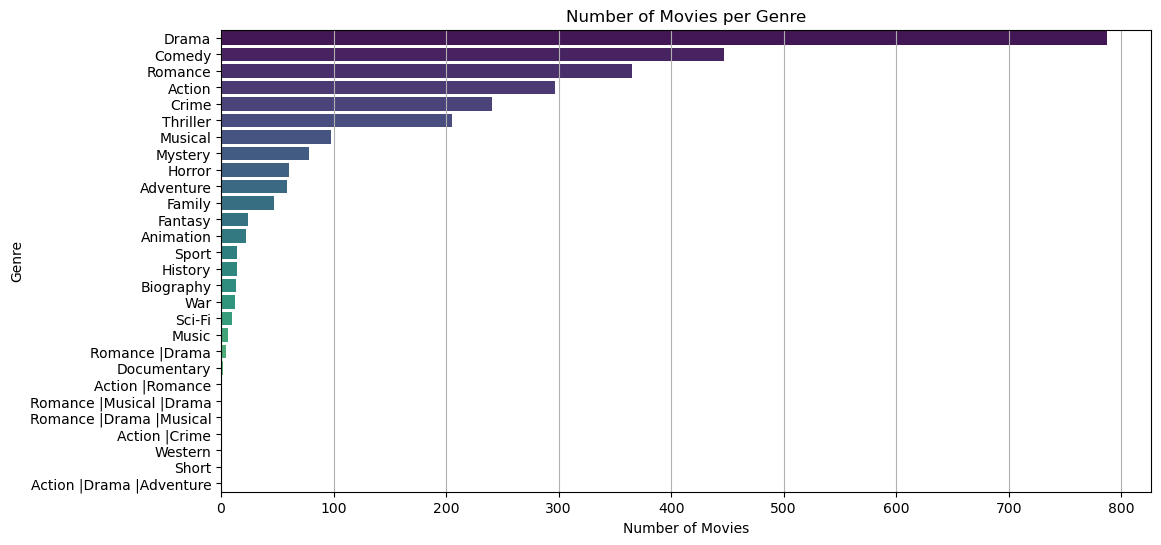

In [22]:
# Create a DataFrame with genre names and their movie counts
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'MovieCount']

# Plot the number of movies per genre
plt.figure(figsize=(12, 6))
sns.barplot(x='MovieCount', y='Genre', data=genre_counts_df, palette='viridis')
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.show()


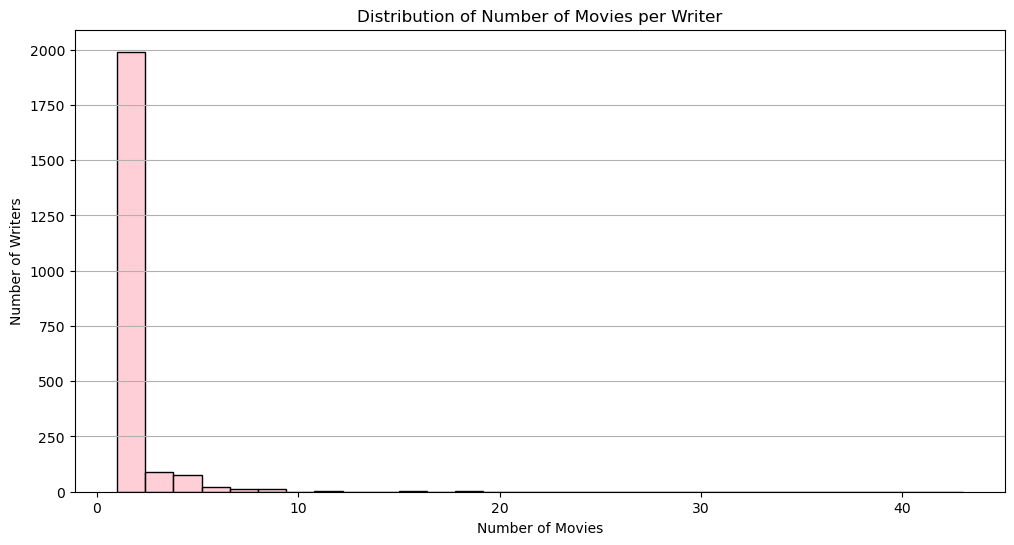

In [23]:
# Create a DataFrame with writer names and their movie counts
writer_counts = pd.DataFrame(pd.Series(all_writers).value_counts(), columns=['MovieCount'])

# Plot the histogram of the number of movies per writer
plt.figure(figsize=(12, 6))
sns.histplot(writer_counts['MovieCount'], bins=30, color='pink')
plt.title('Distribution of Number of Movies per Writer')
plt.xlabel('Number of Movies')
plt.ylabel('Number of Writers')
plt.grid(axis='y')
plt.show()


/tmp/ipykernel_20/1968660321.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/1968660321.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/1968660321.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)
/tmp/ipykernel_20/1968660321.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

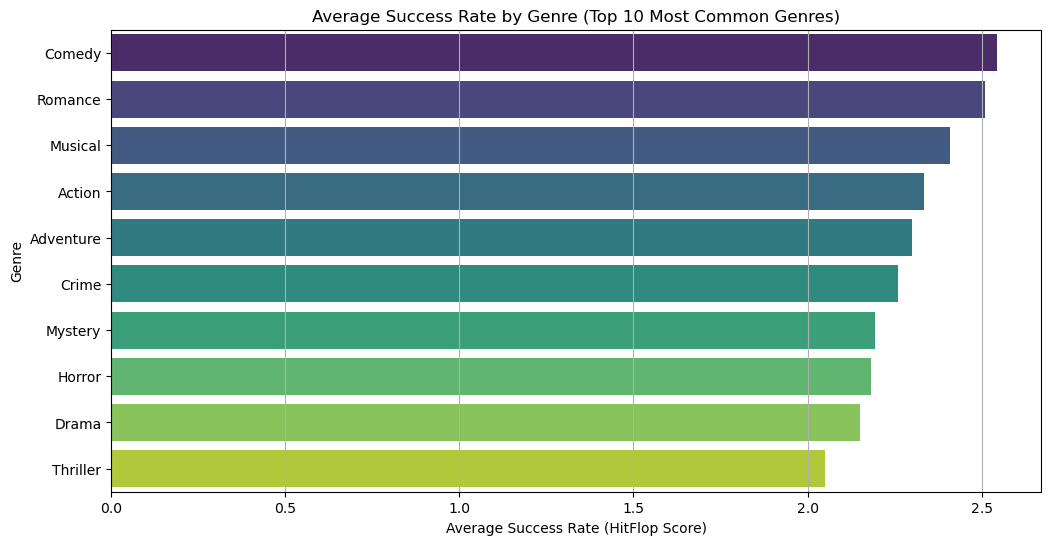

In [24]:
# Create a DataFrame to store the success rate for each genre
genre_success_rate = pd.DataFrame(columns=['Genre', 'SuccessRate'])

# Calculate the success rate for each genre
for genre in top_genres:
    genre_movies = df[df['genre'].str.contains(genre, na=False)]
    success_rate = genre_movies['hitFlop'].mean()
    genre_success_rate = genre_success_rate.append({'Genre': genre, 'SuccessRate': success_rate}, ignore_index=True)

# Sort the DataFrame by success rate in descending order
genre_success_rate = genre_success_rate.sort_values(by='SuccessRate', ascending=False)

# Plot the success rate of the genres
plt.figure(figsize=(12, 6))
sns.barplot(x='SuccessRate', y='Genre', data=genre_success_rate, palette='viridis')
plt.title('Average Success Rate by Genre (Top 10 Most Common Genres)')
plt.xlabel('Average Success Rate (HitFlop Score)')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.show()


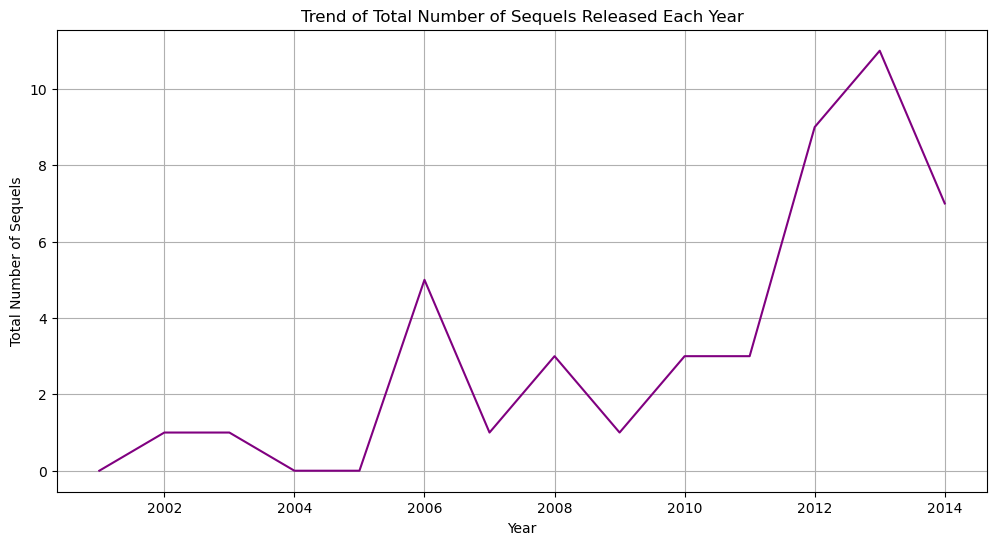

In [25]:
# Calculate the total number of sequels released each year
total_sequels_year = df_sequel.groupby('releaseYear')['sequel'].sum()

# Plot the trend of the total number of sequels released each year
plt.figure(figsize=(12, 6))
sns.lineplot(x=total_sequels_year.index, y=total_sequels_year.values, color='purple')
plt.title('Trend of Total Number of Sequels Released Each Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Sequels')
plt.grid()
plt.show()


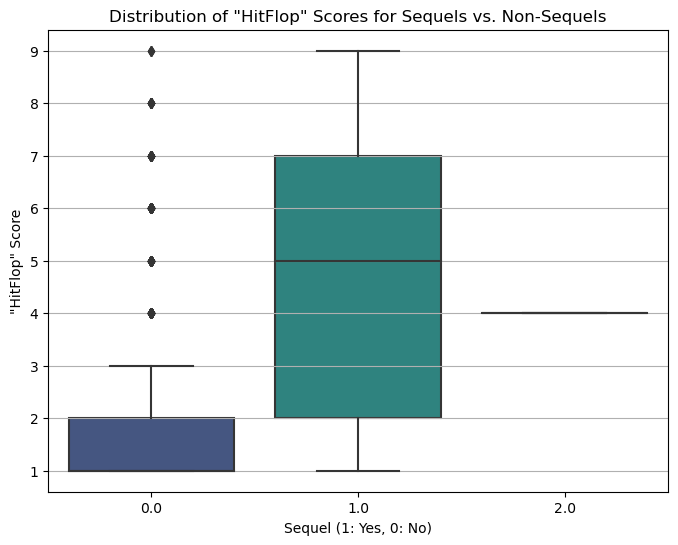

In [26]:
# Create a box plot of the 'hitFlop' scores for sequels and non-sequels
plt.figure(figsize=(8, 6))
sns.boxplot(x='sequel', y='hitFlop', data=df_sequel, palette='viridis')
plt.title('Distribution of "HitFlop" Scores for Sequels vs. Non-Sequels')
plt.xlabel('Sequel (1: Yes, 0: No)')
plt.ylabel('"HitFlop" Score')
plt.grid(axis='y')
plt.show()


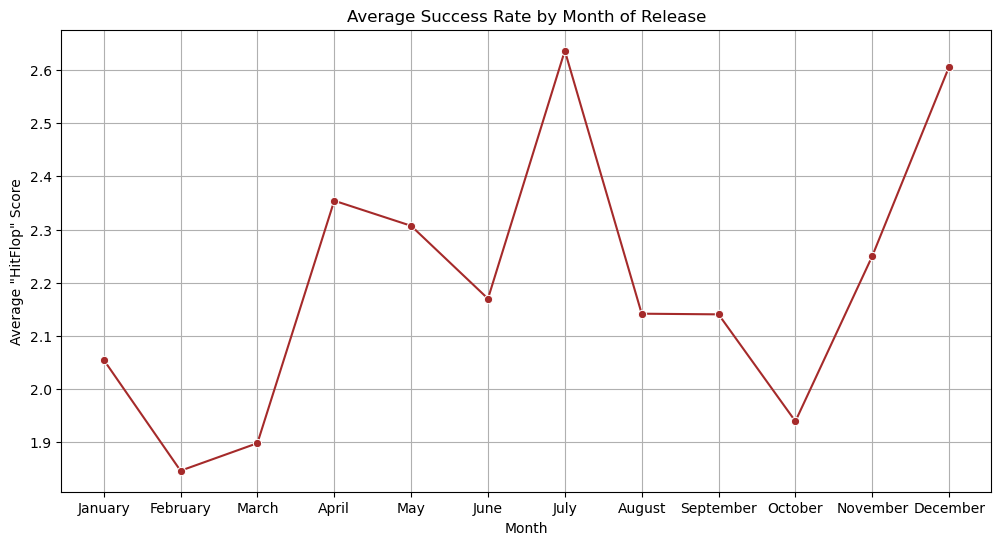

In [27]:
# Calculate the average "hitFlop" score for each month
avg_hitFlop_month = df.groupby('releaseMonth')['hitFlop'].mean()

# Create a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the trend of the average "hitFlop" scores across months
plt.figure(figsize=(12, 6))
sns.lineplot(x=month_names, y=avg_hitFlop_month.values, marker='o', color='brown')
plt.title('Average Success Rate by Month of Release')
plt.xlabel('Month')
plt.ylabel('Average "HitFlop" Score')
plt.grid()
plt.show()


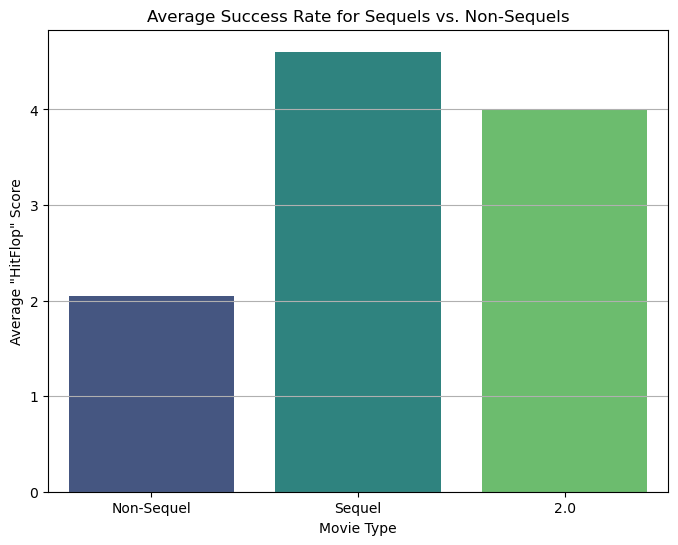

In [28]:
# Calculate the average "hitFlop" score for sequels and non-sequels
avg_hitFlop_sequel = df_sequel.groupby('sequel')['hitFlop'].mean()

# Create a DataFrame for the plot
avg_hitFlop_sequel_df = avg_hitFlop_sequel.reset_index()
avg_hitFlop_sequel_df['sequel'] = avg_hitFlop_sequel_df['sequel'].replace({0: 'Non-Sequel', 1: 'Sequel'})

# Plot the average "hitFlop" scores for sequels and non-sequels
plt.figure(figsize=(8, 6))
sns.barplot(x='sequel', y='hitFlop', data=avg_hitFlop_sequel_df, palette='viridis')
plt.title('Average Success Rate for Sequels vs. Non-Sequels')
plt.xlabel('Movie Type')
plt.ylabel('Average "HitFlop" Score')
plt.grid(axis='y')
plt.show()


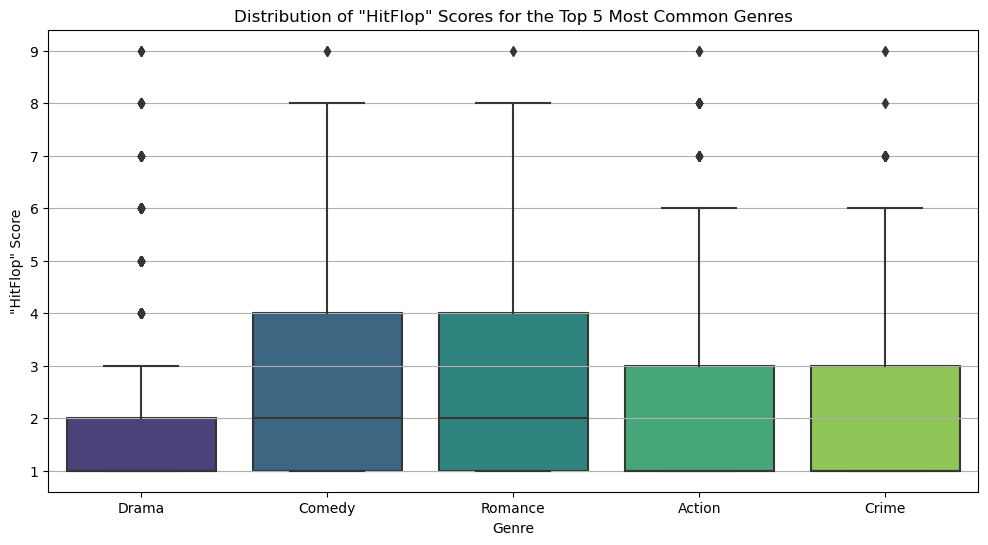

In [29]:
# Select the top 5 most common genres
top_5_genres = genre_counts.head(5).index.tolist()

# Filter the DataFrame to include only movies of the top 5 genres
df_top_genres = df[df['genre'].str.contains('|'.join(top_5_genres), na=False)]

# Create a list to store the genre and "hitFlop" score for each movie
genre_hitFlop_list = []

# Populate the list with the genre and "hitFlop" score for each movie
for genre in top_5_genres:
    genre_movies = df_top_genres[df_top_genres['genre'].str.contains(genre, na=False)]
    genre_hitFlop = genre_movies[['genre', 'hitFlop']].copy()
    genre_hitFlop['genre'] = genre
    genre_hitFlop_list.append(genre_hitFlop)

# Concatenate the DataFrames in the list
df_genre_hitFlop = pd.concat(genre_hitFlop_list)

# Create box plots of the 'hitFlop' scores for the top 5 genres
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='hitFlop', data=df_genre_hitFlop, palette='viridis')
plt.title('Distribution of "HitFlop" Scores for the Top 5 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('"HitFlop" Score')
plt.grid(axis='y')
plt.show()


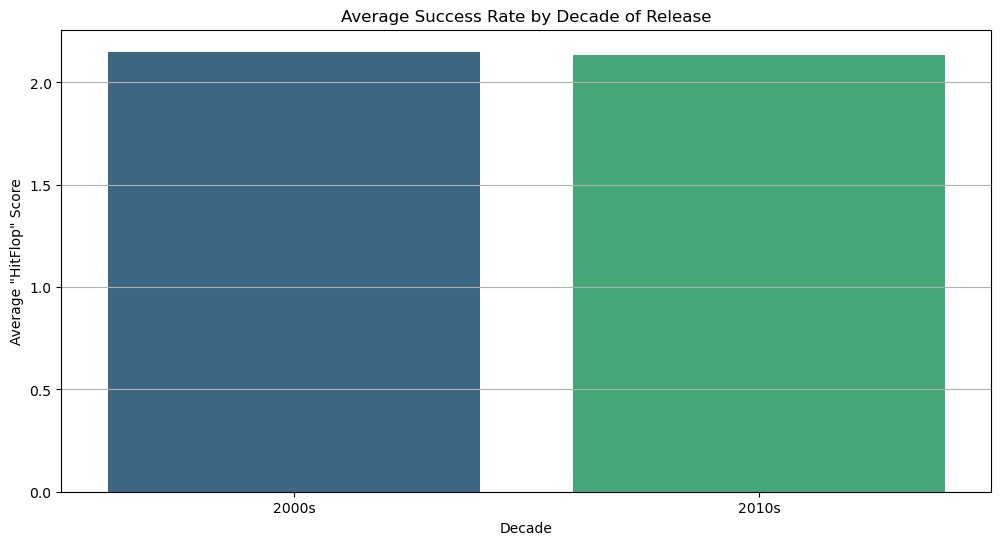

In [30]:
# Calculate the decade of each movie's release
df['releaseDecade'] = (df['releaseYear'] // 10) * 10

# Calculate the average "hitFlop" score for each decade
avg_hitFlop_decade = df.groupby('releaseDecade')['hitFlop'].mean()

# Create a DataFrame for the plot
avg_hitFlop_decade_df = avg_hitFlop_decade.reset_index()
avg_hitFlop_decade_df['releaseDecade'] = avg_hitFlop_decade_df['releaseDecade'].astype(str) + 's'

# Plot the average "hitFlop" scores for each decade
plt.figure(figsize=(12, 6))
sns.barplot(x='releaseDecade', y='hitFlop', data=avg_hitFlop_decade_df, palette='viridis')
plt.title('Average Success Rate by Decade of Release')
plt.xlabel('Decade')
plt.ylabel('Average "HitFlop" Score')
plt.grid(axis='y')
plt.show()


/tmp/ipykernel_20/3840187567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sequel['releaseDecade'] = (df_sequel['releaseYear'] // 10) * 10


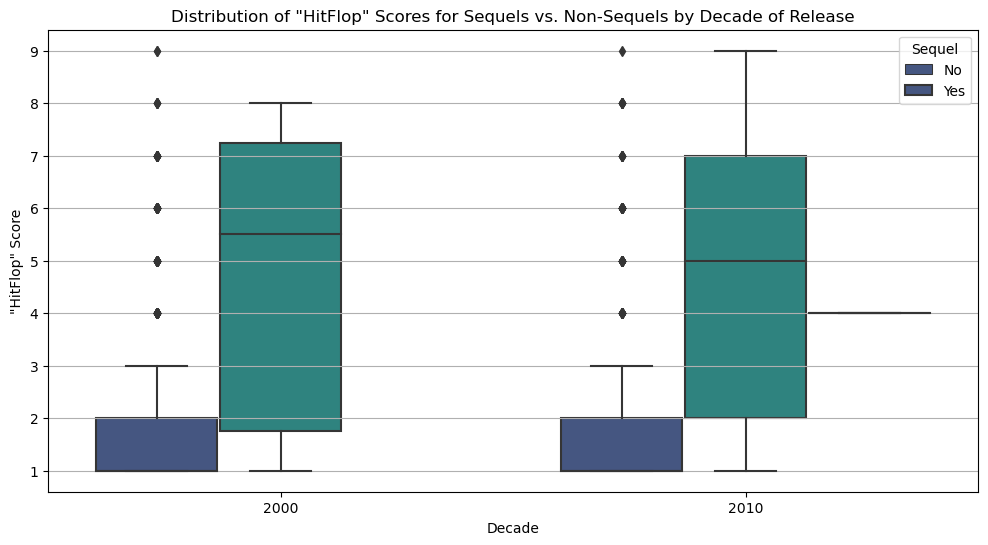

In [31]:
# Calculate the decade of each movie's release in the subset of the data where the sequel status is available
df_sequel['releaseDecade'] = (df_sequel['releaseYear'] // 10) * 10

# Create box plots of the 'hitFlop' scores for sequels and non-sequels in each decade
plt.figure(figsize=(12, 6))
sns.boxplot(x='releaseDecade', y='hitFlop', hue='sequel', data=df_sequel, palette='viridis')
plt.title('Distribution of "HitFlop" Scores for Sequels vs. Non-Sequels by Decade of Release')
plt.xlabel('Decade')
plt.ylabel('"HitFlop" Score')
plt.legend(title='Sequel', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


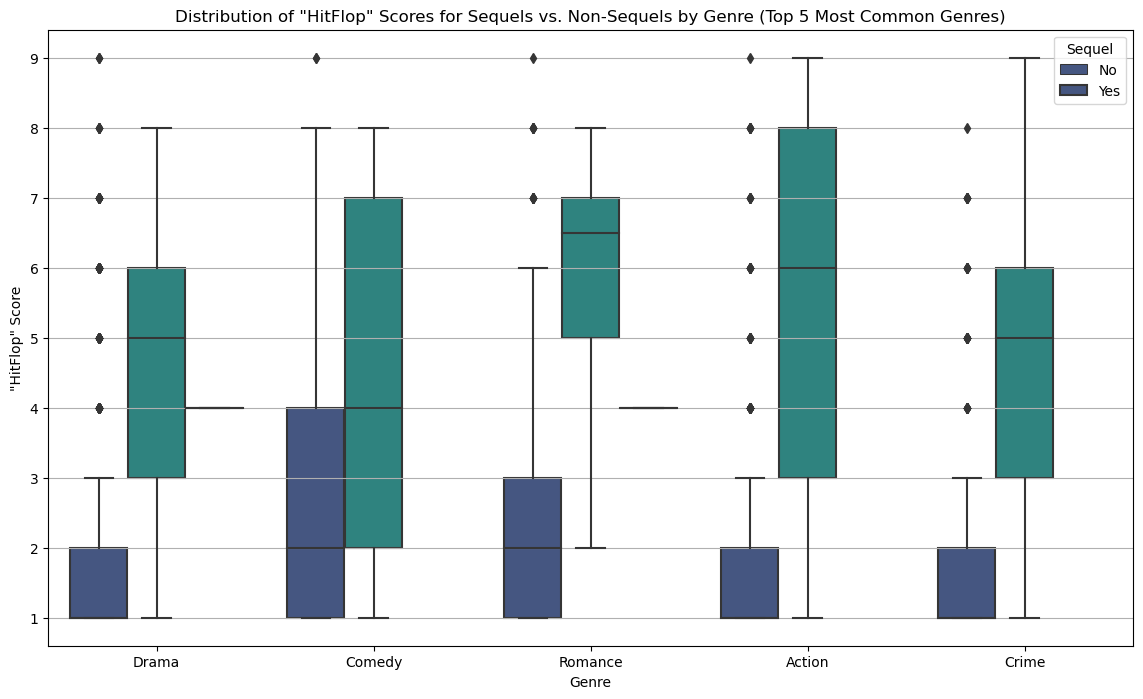

In [32]:
# Filter the DataFrame to include only movies of the top 5 genres where the sequel status is available
df_sequel_top_genres = df_sequel[df_sequel['genre'].str.contains('|'.join(top_5_genres), na=False)]

# Create a list to store the genre, sequel status, and "hitFlop" score for each movie
genre_sequel_hitFlop_list = []

# Populate the list with the genre, sequel status, and "hitFlop" score for each movie
for genre in top_5_genres:
    genre_movies = df_sequel_top_genres[df_sequel_top_genres['genre'].str.contains(genre, na=False)]
    genre_sequel_hitFlop = genre_movies[['genre', 'sequel', 'hitFlop']].copy()
    genre_sequel_hitFlop['genre'] = genre
    genre_sequel_hitFlop_list.append(genre_sequel_hitFlop)

# Concatenate the DataFrames in the list
df_genre_sequel_hitFlop = pd.concat(genre_sequel_hitFlop_list)

# Create box plots of the 'hitFlop' scores for sequels and non-sequels in each of the top 5 genres
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='hitFlop', hue='sequel', data=df_genre_sequel_hitFlop, palette='viridis')
plt.title('Distribution of "HitFlop" Scores for Sequels vs. Non-Sequels by Genre (Top 5 Most Common Genres)')
plt.xlabel('Genre')
plt.ylabel('"HitFlop" Score')
plt.legend(title='Sequel', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


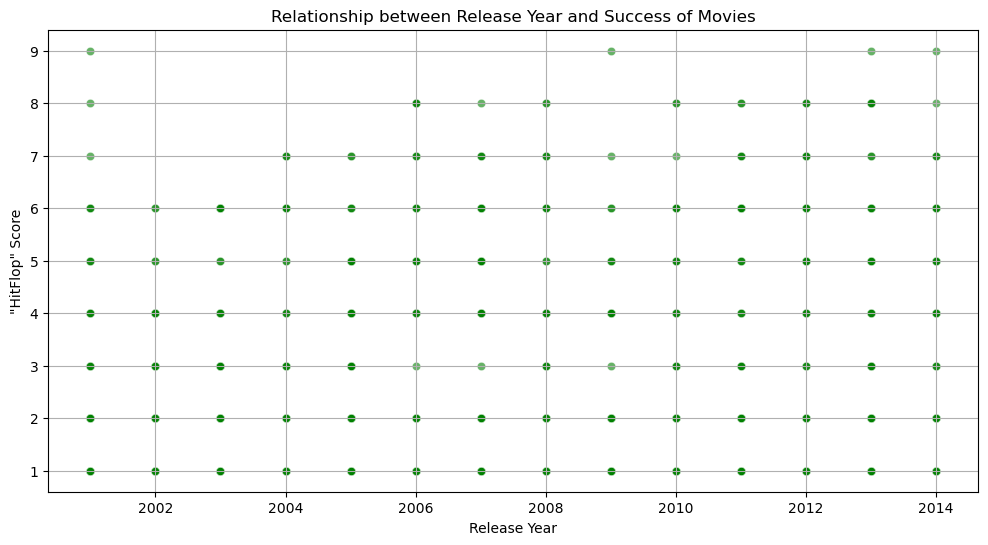

In [33]:
# Create a scatter plot of the 'hitFlop' scores versus the release year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='releaseYear', y='hitFlop', data=df, color='green', alpha=0.6)
plt.title('Relationship between Release Year and Success of Movies')
plt.xlabel('Release Year')
plt.ylabel('"HitFlop" Score')
plt.grid()
plt.show()


In [34]:
# Remove rows with missing director values
df_director = df.dropna(subset=['directors'])

# Calculate the number of movies and the average "hitFlop" score for each director
director_counts = df_director['directors'].value_counts()
director_avg_hitFlop = df_director.groupby('directors')['hitFlop'].mean()

# Create a DataFrame with the number of movies and the average "hitFlop" score for each director
df_director_avg_hitFlop = pd.DataFrame({'numMovies': director_counts, 'avgHitFlop': director_avg_hitFlop})

# Filter the DataFrame to include only directors who have directed at least 3 movies
df_director_avg_hitFlop = df_director_avg_hitFlop[df_director_avg_hitFlop['numMovies'] >= 3]

# Identify the top 10 directors with the highest average success rates
top_directors = df_director_avg_hitFlop.nlargest(10, 'avgHitFlop').reset_index()
top_directors.rename(columns={'directors': 'Director', 'numMovies': 'Number of Movies', 'avgHitFlop': 'Average "HitFlop" Score'}, inplace=True)
top_directors


,index,Number of Movies,"Average ""HitFlop"" Score"
0,Rajkumar Hirani,4,8.000000
1,Farah Khan,4,6.500000
2,Karan Johar,4,6.000000
3,Rohit Shetty,10,5.700000
4,Kabir Khan,3,5.333333
5,Anees Bazmee,7,5.142857
6,Maneesh Sharma,3,5.000000
7,Siddharth Anand,5,5.000000
8,Ashwani Dhir,3,4.666667
9,Sajid Khan,5,4.600000
